In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy
import math
from scipy.optimize import minimize
from pulp import *
from numpy.linalg import inv

In [3]:
data = pd.read_csv("F:\\szakdoga\\data.csv", delimiter = ",", names = ['x','y','z'])
data = data.drop(data.index[0])
#data = data[:25]
#print(data)

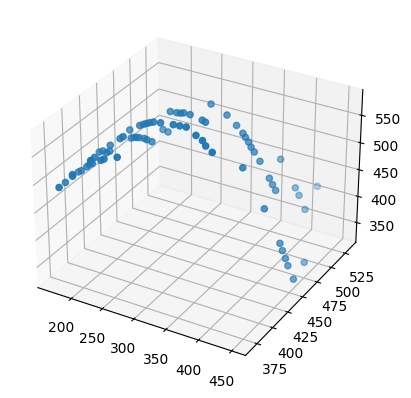

In [3]:
ax = plt.axes(projection='3d')
ax.scatter3D(data['x'], data['z'], data['y']);

In [4]:
a_x = 454.3
b_x = -5.108
a_y = 324.1
b_y = 12.28
c_y = -0.1718
a_z = 471.4
b_z = 0.3192
c_z = -0.0269

In [5]:
#x-re
palya1_x = []
for i in range(len(data['x'])):
    palya1_x.append(a_x+i*b_x)

In [6]:
#y-ra
palya1_y = []
for i in range(len(data['y'])):
    palya1_y.append(a_y+i*b_y+c_y*i**2)

In [7]:
#z-re
palya1_z = []
for i in range(len(data['z'])):
    palya1_z.append(a_z+i*b_z+c_z*i**2)

In [8]:
zipped1 = list(zip(palya1_x, palya1_y, palya1_z))
palyagorbe1 = pd.DataFrame(zipped1,columns=['x', 'y', 'z'])
#print(palyagorbe1)

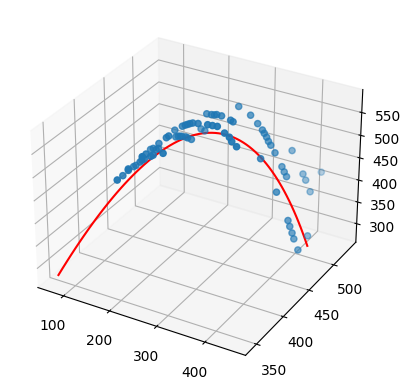

In [9]:
ax2 = plt.axes(projection='3d')
ax2.scatter3D(data['x'], data['z'], data['y']);
plt.plot(palyagorbe1['x'], palyagorbe1['z'], palyagorbe1['y'], c ='r')
plt.show()

In [4]:
#60 fps-en egy frame 16,67 ms
delta_t = 0.01667#sec

In [5]:
#x-re
v_1 = []
a_1 = []
for i in range(2,len(data['x'])):
    v_1.append((data['x'][i+1]/100-data['x'][i-1]/100)/(2*delta_t))
    a_1.append((data['x'][i+1]/100-2*data['x'][i]/100+data['x'][i-1]/100)/(delta_t)**2)
v_1 = np.array(v_1)
a_1 = np.array(a_1)
#print(len(v_1))
#print(a_1)

In [6]:
#y-ra
v_2 = []
a_2 = []
for i in range(2,len(data['y'])):
    v_2.append((data['y'][i+1]/100-data['y'][i-1]/100)/(2*delta_t))
    a_2.append((data['y'][i+1]/100-2*data['y'][i]/100+data['y'][i-1]/100)/(delta_t)**2)
v_2 = np.array(v_2)
a_2 = np.array(a_2)
#print(v_y)
#print(a_y)

In [7]:
#z-re
v_3 = []
a_3 = []
for i in range(2,len(data['z'])):
    v_3.append((data['z'][i+1]/100-data['z'][i-1]/100)/(2*delta_t))
    a_3.append((data['z'][i+1]/100-2*data['z'][i]/100+data['z'][i-1]/100)/(delta_t)**2)
v_3 = np.array(v_3)
a_3 = np.array(a_3)
#print(v_z)
#print(a_z)

K = 2

In [8]:
N = len(v_1)
#print(N)
S = np.zeros(4)
M = np.zeros((4,4))

In [9]:
e_an = []
for i in range(N):
    e_an.append(a_1[i]+a_2[i]+a_3[i])
e_an = np.array(e_an)
S[0] = np.sum(e_an)/N

In [10]:
vn_an = []
for i in range(N):
    vn_an.append(v_1[i]*a_1[i] + v_2[i]*a_2[i] + v_3[i]*a_3[i])
vn_an = np.array(vn_an)
s1_hez = np.zeros(N)
for i in range(N):
    s1_hez[i] = vn_an[i]
S[1] = np.sum(s1_hez)/N
#print(abs_vn)

In [11]:
abs_vn = []
for i in range(N):
    abs_vn.append(math.sqrt(v_1[i]**2+v_2[i]**2+v_3[i]**2))
abs_vn = np.array(abs_vn)
s2_hoz = np.zeros(N)
for i in range(N):
    s2_hoz[i] = abs_vn[i]*vn_an[i]
S[2] = np.sum(s2_hoz)/N
#print(S)

In [12]:
abs2_vn = abs_vn**2
s3_hoz = np.zeros(N)
for i in range(N):
    s3_hoz[i] = abs2_vn[i]*vn_an[i]
S[3] = np.sum(s3_hoz)/N
print(S)

[-3.69819927e-02 -1.67021834e+01  2.73527980e+03  3.05426871e+04]


In [21]:
e_vn = []
for i in range(N):
    e_vn.append(v_1[i]+v_2[i]+v_3[i])
e_vn = np.array(e_vn)
for i in range(4):
    for j in range(4):
        if i == 0 and j == 0:
            M[i,j] = 1
        elif i == 0 and j > 0:
            M[i,j] = np.sum(e_vn*abs_vn**(j-1))/N
        else:
            M[i,j] = np.sum(abs_vn**(i+j))/N
print(M)
#print(np.linalg.eig(M))
#print(np.linalg.eig(np.linalg.pinv(M)))

[[ 1.00000000e+00 -1.44283419e-01  1.63259049e+00  9.92196589e+01]
 [ 7.55927732e+00  7.37697400e+01  9.00930717e+02  1.32778484e+04]
 [ 7.37697400e+01  9.00930717e+02  1.32778484e+04  2.26912958e+05]
 [ 9.00930717e+02  1.32778484e+04  2.26912958e+05  4.32744650e+06]]


In [31]:
#np.matmul(inv(M),S)
np.matmul(np.linalg.pinv(M,rcond = 1e-7),S)

array([  10.47083898, -108.31611123,   16.69301019,   -0.53808782])